# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data in

In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [17]:
# cdf (df 의 일부) 만들기

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Let's plot Emission values with respect to Engine size:

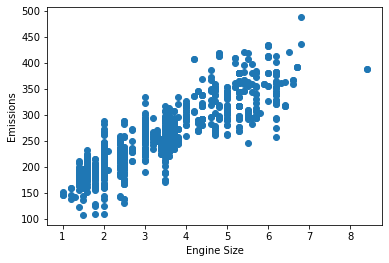

In [14]:
# plot scatterplot (이렇게 scatterplot 을 그려보면서 linear relationship 임을 확인)

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  **np.random.rand()** function:

In [16]:
# train data, test data split

msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]
test = cdf[~msk]

#### Train data distribution

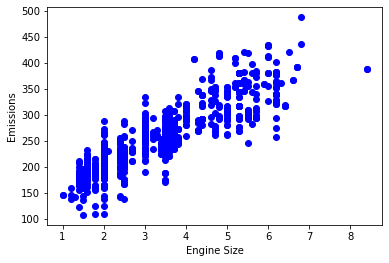

In [18]:
# train data 로 scatterplot

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()


## Multiple Regression Model

In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. 
An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [20]:
train.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136


In [21]:
# Build Model

from sklearn import linear_model

regr = linear_model.LinearRegression() # regr 개체 만들기

x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]) # np.asanyarray() 함수: 배열 형태로 전환해 주는 함수
y = np.asanyarray(train[['CO2EMISSIONS']])

# Fit model

regr.fit(x, y)

LinearRegression()

In [24]:
# The coefficients

print("Coefficients: ", regr.coef_)

Coefficients:  [[9.72570511 8.19145479 9.63265199]]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

## Prediction

In [28]:
# predict yhat

y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])

x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test)**2))

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares (MSE): 483.39
Variance score: 0.88


## Practice

Try to use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [27]:
# Build Model

lr = linear_model.LinearRegression() 

train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

lr.fit(train_x, train_y)

LinearRegression()

In [30]:
# Predition y_hat with model

test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_hat = lr.predict(test_x)

print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y)**2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(test_x, test_y))

Residual sum of squares (MSE): 480.89
Variance score: 0.88


#### 결론: 변수 변경 전 (FUELCONSUMPTION_COMB), 후 (FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) 의 모델 결과가 거의 비슷